### Name: Eunice Adu-Agyei

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
from scipy.special import expit
from scipy.stats import logistic
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
depression = pd.read_csv("Student Depression Dataset.csv")
depression

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [12]:
depression.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [15]:
depression.describe(include = "all")

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [16]:
len(depression)

27901

In [19]:
depression.describe(include = ["O"])

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


In [21]:
depression2 = depression.dropna()
depression2

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [23]:
depression2

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [25]:
len(depression2)

27898

In [27]:
depression2.describe(include = "all")

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27898.000000,27898,27898.000000,27898,27898,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898,27898,27898,27898,27898.000000,27898.000000,27898,27898.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15546,NaN,1570,27867,NaN,NaN,NaN,NaN,NaN,8309,10316,6080,17656,NaN,NaN,14397,NaN
mean,70442.953402,NaN,25.822174,NaN,NaN,3.141336,0.000430,7.656160,2.943974,0.000681,NaN,NaN,NaN,NaN,7.156570,3.139867,NaN,0.585526
std,40642.015063,NaN,4.905651,NaN,NaN,1.381462,0.043994,1.470708,1.361122,0.044397,NaN,NaN,NaN,NaN,3.707598,1.437347,NaN,0.492640
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35040.750000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70689.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105824.750000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [29]:
depression3 = pd.get_dummies(depression2, columns = ["Gender","Have you ever had suicidal thoughts ?","Family History of Mental Illness","Sleep Duration"], drop_first = True)

In [31]:
depression3.head(10)

,id,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,...,Work/Study Hours,Financial Stress,Depression,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others
0,2,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,Healthy,...,3.0,1.0,1,True,True,False,False,False,False,False
1,8,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,Moderate,...,3.0,2.0,0,False,False,True,False,False,False,False
2,26,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Healthy,...,9.0,1.0,0,True,False,True,False,True,False,False
3,30,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,Moderate,...,4.0,5.0,1,False,True,True,True,False,False,False
4,32,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,Moderate,...,1.0,1.0,0,False,True,False,False,False,False,False
5,33,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Healthy,...,4.0,1.0,0,True,False,False,False,True,False,False
6,52,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,Healthy,...,1.0,2.0,0,True,False,False,True,False,False,False
7,56,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Unhealthy,...,0.0,1.0,0,False,False,True,False,True,False,False
8,59,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,Moderate,...,12.0,3.0,1,True,True,False,True,False,False,False
9,62,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Moderate,...,2.0,5.0,1,True,True,False,False,True,False,False


In [33]:
depression3.columns

Index(['id', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Dietary Habits',
       'Degree', 'Work/Study Hours', 'Financial Stress', 'Depression',
       'Gender_Male', 'Have you ever had suicidal thoughts ?_Yes',
       'Family History of Mental Illness_Yes', 'Sleep Duration_7-8 hours',
       'Sleep Duration_Less than 5 hours', 'Sleep Duration_More than 8 hours',
       'Sleep Duration_Others'],
      dtype='object')

In [35]:
logit_model = smf.logit('Depression ~ Q("Sleep Duration_7-8 hours") + Q("Sleep Duration_Less than 5 hours") + Q("Sleep Duration_More than 8 hours") + Q("Sleep Duration_Others") + Q("Work/Study Hours") + Q("Academic Pressure") + Q("Financial Stress") + Q("Study Satisfaction") + Q("CGPA")', depression3).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.473531
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27898
Model:                          Logit   Df Residuals:                    27888
Method:                           MLE   Df Model:                            9
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.3020
Time:                        17:27:55   Log-Likelihood:                -13211.
converged:                       True   LL-Null:                       -18927.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -4.5749      0.115    -39.824      0.000      -4.800      -4.350
Q("Sleep Duration_7-8 hours")[T.True]             0.1157      0.043      2.663      0.008       0.031       0.201
Q("Sleep Duration_Less than 5 hours")[T.True]     0.3887      0.043      9.062      0.000       0.305       0.473
Q("Sleep Duration_More than 8 hours")[T.True]    -0.2321      0.045     -5.111      0.000      -0.321      -0.143
Q("Sleep Duration_Others")[T.True]               -0.0856      0.553     -0.155      0.877      -1.169       0.997
Q("Work/Study Hours")                             0.1168      0.004     28.084      0.000       0.109       0.125
Q("Academic Pressure")                            0.8292      0.012     66.527      0.000       0.805       0.854
Q("Financial Stress")                             0.5782      0.011     51.537      0.000       0.556       0.600
Q("Study Satisfaction")                          -0.2200      0.011    -19.396      0.000      -0.242      -0.198
Q("CGPA")                                         0.0503      0.010      4.849      0.000       0.030       0.071
=================================================================================================================
"""

In [36]:
confusion_matrix1 = logit_model.pred_table()
confusion_matrix1

array([[ 8037.,  3526.],
       [ 2676., 13659.]])

In [37]:
confusion_matrix1[0][0]

8037.0

In [41]:
confusion_matrix1[0][1]

3526.0

In [43]:
confusion_matrix1[1][0]

2676.0

In [45]:
confusion_matrix1[1][1]

13659.0

In [47]:
true_neg = confusion_matrix1[0][0]
false_neg = confusion_matrix1[1][0]
false_pos = confusion_matrix1[0][1]
true_pos = confusion_matrix1[1][1]

In [49]:
sensitivity = true_pos/(true_pos + false_neg)
sensitivity

0.8361799816345271

In [ ]:
specificity = true_neg/(true_neg + false_pos)
specificity

In [ ]:
accuracy = (true_pos + true_neg)/len(depression3)
accuracy

In [ ]:
precision = true_pos/(true_pos + false_pos)
precision

In [ ]:
logit_model2 = smf.logit('Depression ~ Q("Work/Study Hours") + Q("Academic Pressure") + Q("Financial Stress") + Q("Study Satisfaction") + Q("CGPA")', depression3).fit()
logit_model2.summary()

In [ ]:
confusion_matrix2 = logit_model2.pred_table()
confusion_matrix2

In [ ]:
confusion_matrix2[0][0]

In [ ]:
confusion_matrix2[0][1]

In [ ]:
confusion_matrix2[1][0]

In [ ]:
confusion_matrix2[1][1]

In [ ]:
true_neg2 = confusion_matrix2[0][0]
false_neg2 = confusion_matrix2[1][0]
false_pos2 = confusion_matrix2[0][1]
true_pos2 = confusion_matrix2[1][1]

In [ ]:
sensitivity2 = true_pos2/(true_pos2 + false_neg2)
sensitivity2

In [ ]:
specificity2 = true_neg2/(true_neg2 + false_pos2)
specificity2

In [ ]:
accuracy2 = (true_pos2 + true_neg2)/len(depression3)
accuracy2

In [ ]:
precision2 = true_pos2/(true_pos2 + false_pos2)
precision2

In [ ]:
logit_model3 = smf.logit('Depression ~ Q("Work/Study Hours") + Q("Academic Pressure") + Q("Financial Stress") + Q("Study Satisfaction") + Q("CGPA") + Q("Gender_Male")', depression3).fit()
logit_model3.summary()

In [ ]:
confusion_matrix3 = logit_model3.pred_table()
confusion_matrix3

In [ ]:
confusion_matrix3[0][0]

In [ ]:
confusion_matrix3[0][1]

In [ ]:
confusion_matrix3[1][0]

In [ ]:
confusion_matrix3[1][1]

In [ ]:
true_neg3 = confusion_matrix3[0][0]
false_neg3 = confusion_matrix3[1][0]
false_pos3 = confusion_matrix3[0][1]
true_pos3 = confusion_matrix3[1][1]

In [ ]:
sensitivity3 = true_pos3/(true_pos3 + false_neg3)
sensitivity3

In [ ]:
specificity3 = true_neg3/(true_neg3 + false_pos3)
specificity3

In [ ]:
accuracy3 = (true_pos3 + true_neg3)/len(depression3)
accuracy3

In [ ]:
precision3 = true_pos3/(true_pos3 + false_pos3)
precision3

In [ ]:
logit_model4 = smf.logit('Depression ~ Q("Sleep Duration_7-8 hours") + Q("Sleep Duration_Less than 5 hours") + Q("Sleep Duration_More than 8 hours") + Q("Sleep Duration_Others") + Q("Work/Study Hours") + Q("Academic Pressure") + Q("Financial Stress") + Q("Study Satisfaction") + Q("CGPA") + Q("Gender_Male")', depression3).fit()
logit_model4.summary()

In [ ]:
confusion_matrix4 = logit_model4.pred_table()
confusion_matrix4

In [ ]:
confusion_matrix4[0][0]

In [ ]:
confusion_matrix4[0][1]

In [ ]:
confusion_matrix4[1][0]

In [ ]:
confusion_matrix4[1][1]

In [ ]:
true_neg4 = confusion_matrix4[0][0]
false_neg4 = confusion_matrix4[1][0]
false_pos4 = confusion_matrix4[0][1]
true_pos4 = confusion_matrix4[1][1]

In [ ]:
sensitivity4 = true_pos4/(true_pos4 + false_neg4)
sensitivity4

In [ ]:
specificity4 = true_neg4/(true_neg4 + false_pos4)
specificity4

In [ ]:
accuracy4 = (true_pos4 + true_neg4)/len(depression3)
accuracy4

In [ ]:
precision4 = true_pos4/(true_pos4 + false_pos4)
precision4

In [57]:
x = depression3.drop(columns = ["id","Degree","City","Dietary Habits","Depression","Dietary Habits","Profession"])
x

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,True,True,False,False,False,False,False
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,False,False,True,False,False,False,False
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,True,False,True,False,True,False,False
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,False,True,True,True,False,False,False
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,False,True,True,False,False,False,False
27897,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,True,False,True,False,True,False,False
27898,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,True,False,False,False,False,False,False
27899,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,False,True,False,False,True,False,False


In [59]:
y = depression2["Depression"]
y

0        1
1        0
2        0
3        1
4        0
        ..
27896    0
27897    0
27898    0
27899    1
27900    1
Name: Depression, Length: 27898, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(x_train, y_train)

In [ ]:
y_test_pred = knn.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

In [ ]:
true_neg = cm[0][0]
false_neg = cm[1][0]
false_pos = cm[0][1]
true_pos = cm[1][1]

In [ ]:
sensitivity = true_pos/(true_pos + false_neg)
sensitivity

In [ ]:
specificity = true_neg/(true_neg + false_pos)
specificity

In [ ]:
accuracy = (true_pos + true_neg)/len(depression3)
accuracy

In [ ]:
precision = true_pos/(true_pos + false_pos)
precision

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train, y_train)

In [ ]:
y_test_pred = knn.predict(x_test)

In [ ]:
cm2 = confusion_matrix(y_test,y_test_pred)

In [ ]:
true_neg2 = cm2[0][0]
false_neg2 = cm2[1][0]
false_pos2 = cm2[0][1]
true_pos2 = cm2[1][1]

In [ ]:
sen = true_pos2/(true_pos2 + false_neg2)
sen

In [ ]:
spec = true_neg2/(true_neg2 + false_pos2)
spec

In [ ]:
acc = (true_pos2 + true_neg2)/len(depression3)
acc

In [ ]:
prec = true_pos2/(true_pos2 + false_pos2)
prec

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1000)
knn.fit(x_train, y_train)

In [ ]:
y_test_pred = knn.predict(x_test)

In [ ]:
cm3 = confusion_matrix(y_test,y_test_pred)

In [ ]:
true_neg3 = cm3[0][0]
false_neg3 = cm3[1][0]
false_pos3 = cm3[0][1]
true_pos3 = cm3[1][1]

In [ ]:
sen = true_pos3/(true_pos3 + false_neg3)
sen

In [ ]:
spec = true_neg3/(true_neg3 + false_pos3)
spec

In [ ]:
acc = (true_pos3 + true_neg3)/len(depression3)
acc

In [ ]:
prec = true_pos3/(true_pos3 + false_pos3)
prec

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10000)
knn.fit(x_train, y_train)

In [ ]:
y_test_pred = knn.predict(x_test)

In [ ]:
cm4 = confusion_matrix(y_test,y_test_pred)

In [ ]:
true_neg4 = cm4[0][0]
false_neg4 = cm4[1][0]
false_pos4 = cm4[0][1]
true_pos4 = cm4[1][1]

In [ ]:
sen = true_pos4/(true_pos4 + false_neg4)
sen

In [ ]:
spec = true_neg4/(true_neg4 + false_pos4)
spec

In [ ]:
acc = (true_pos4 + true_neg4)/len(depression3)
acc

In [ ]:
prec = true_pos4/(true_pos4 + false_pos4)
prec

Looks like the k classifer has a limit (k = 10000) and the sen to prec dramatically changes too.

In [61]:
kmeans = KMeans(n_clusters=5)

In [63]:
kmeans.fit(x)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [64]:
clusters = kmeans.predict(x)

In [67]:
clusters

array([1, 2, 4, ..., 4, 0, 1])

In [69]:
depression4 = pd.concat([depression2, pd.DataFrame([])], ignore_index=True)
depression4

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27894,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27895,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27896,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [71]:
depression4["clusters"] = clusters

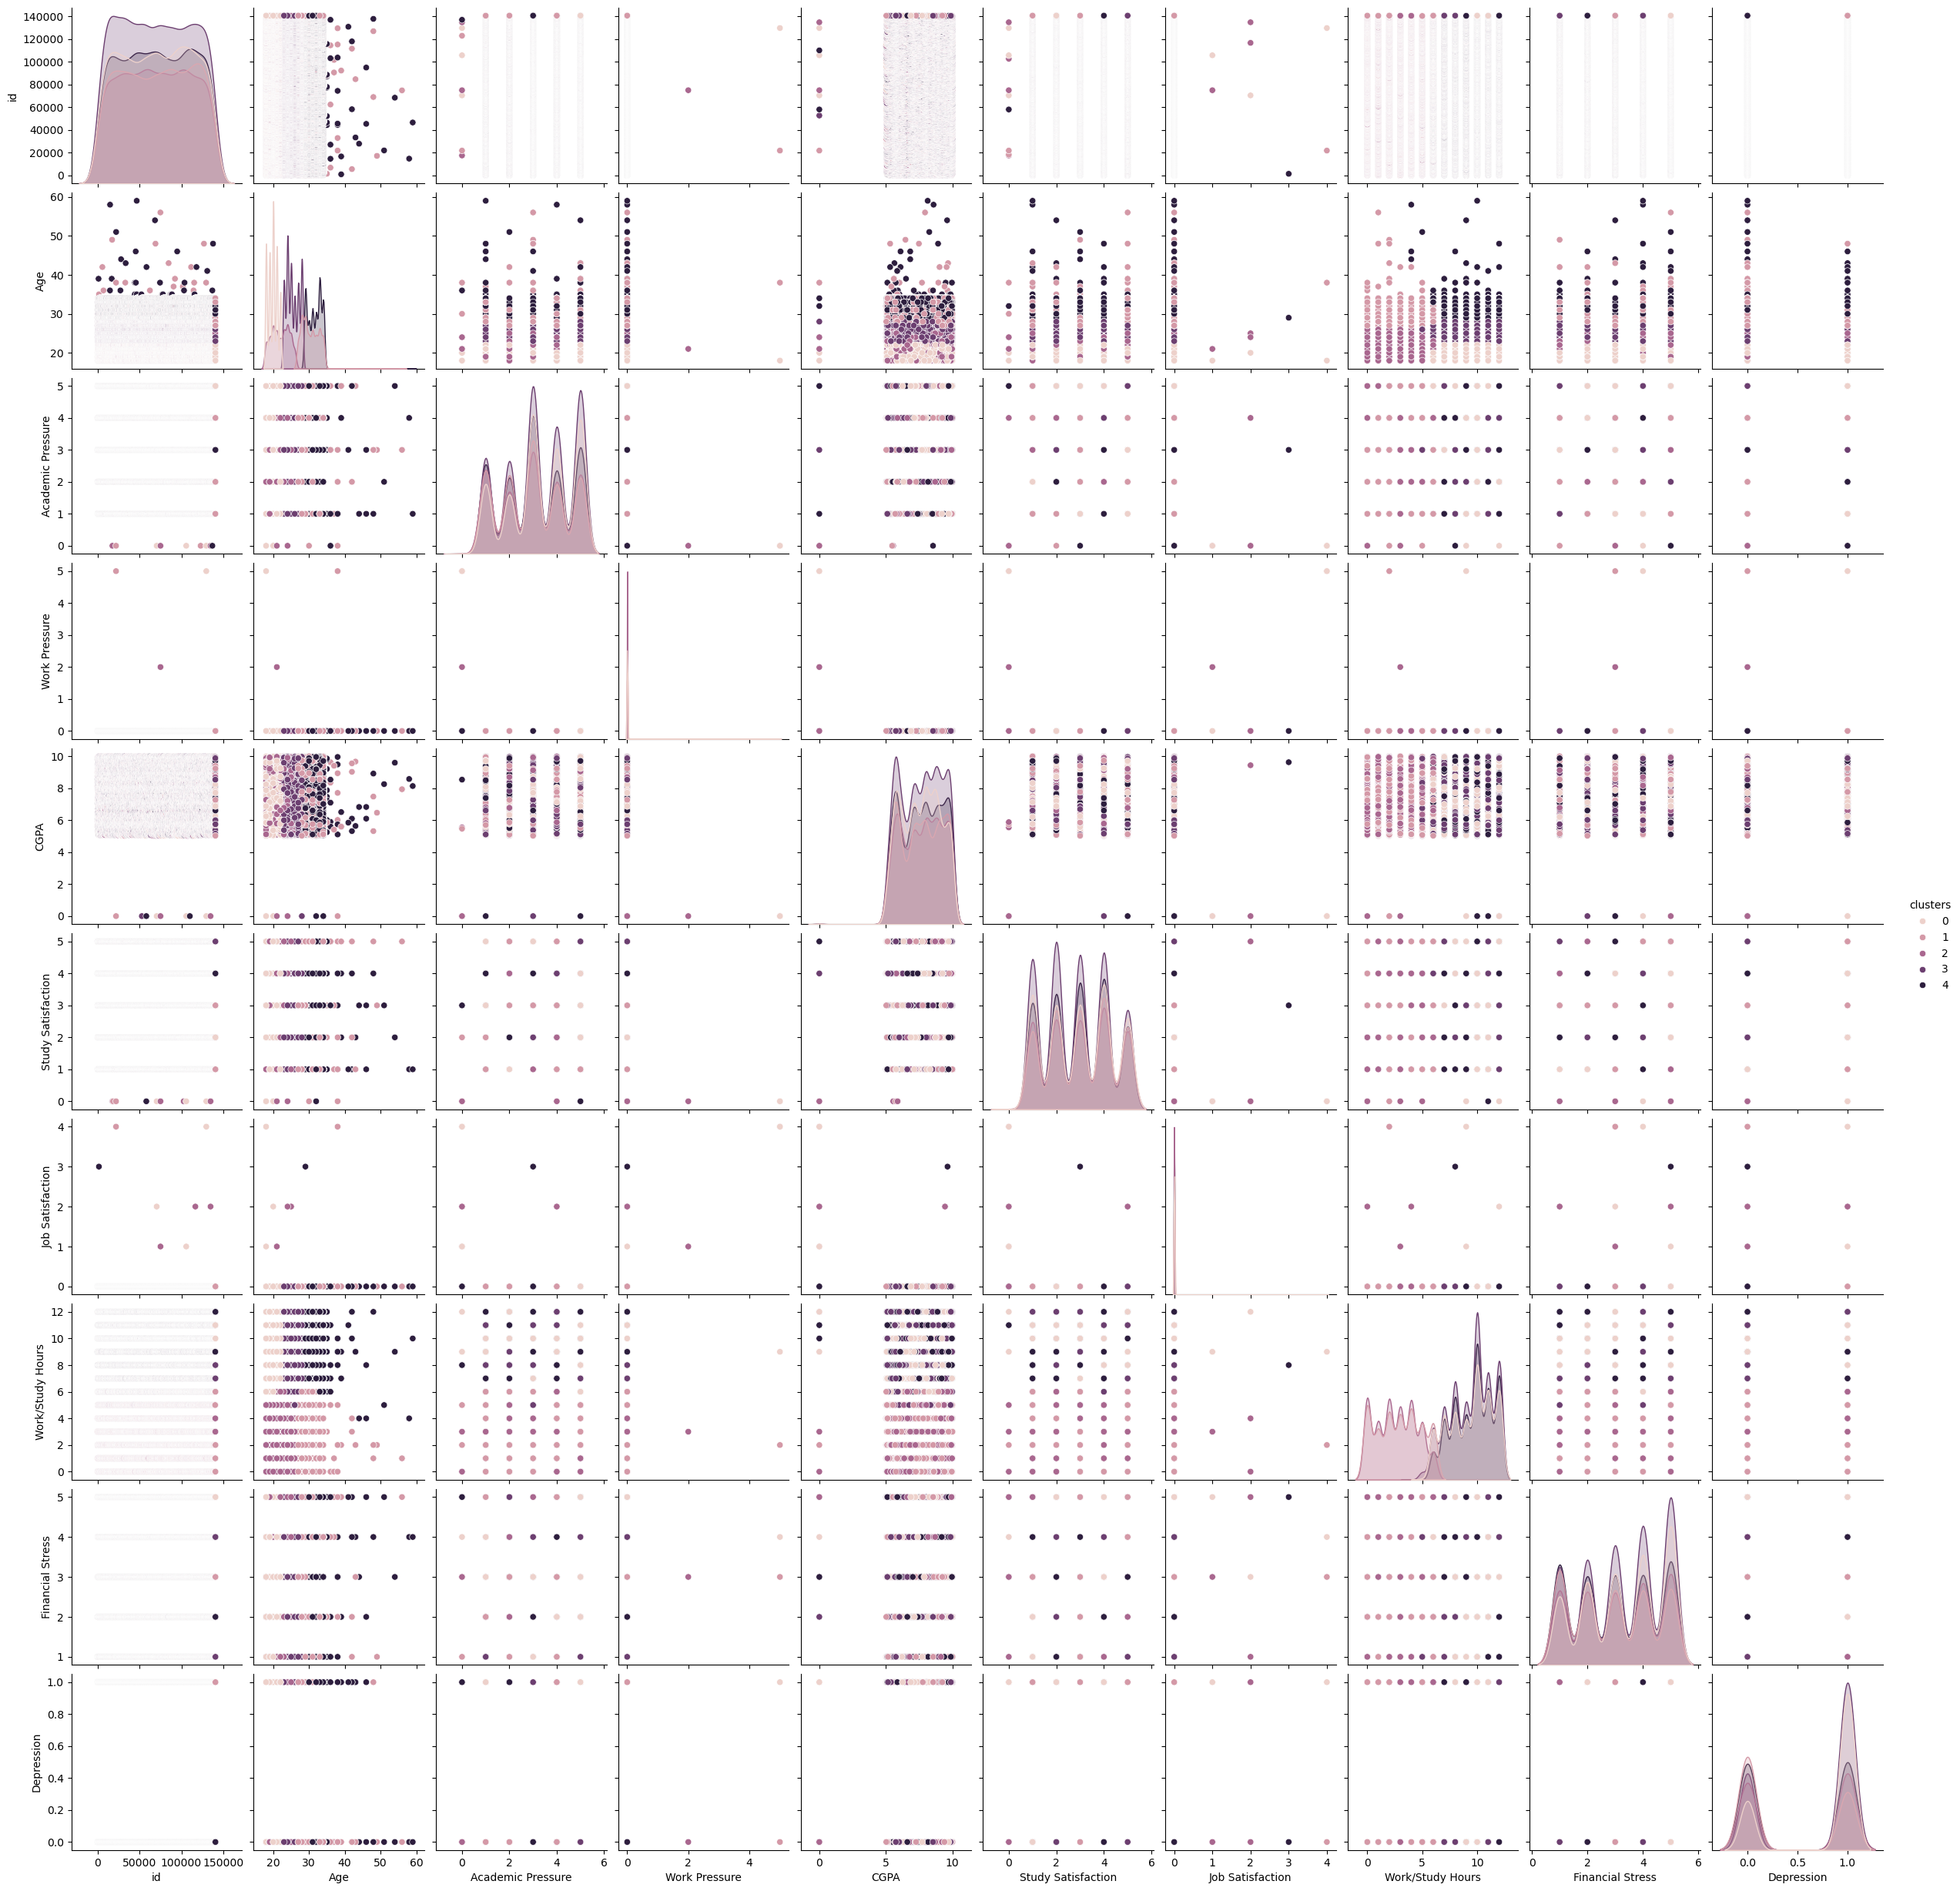

In [73]:
sns.pairplot(data = depression4, hue = "clusters")

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
kmeans_scaled = KMeans(n_clusters = 5)
kmeans_scaled.fit(x_scaled)
clusters_scaled = kmeans_scaled.predict(x_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
depression4["scaled_clusters"] = clusters_scaled

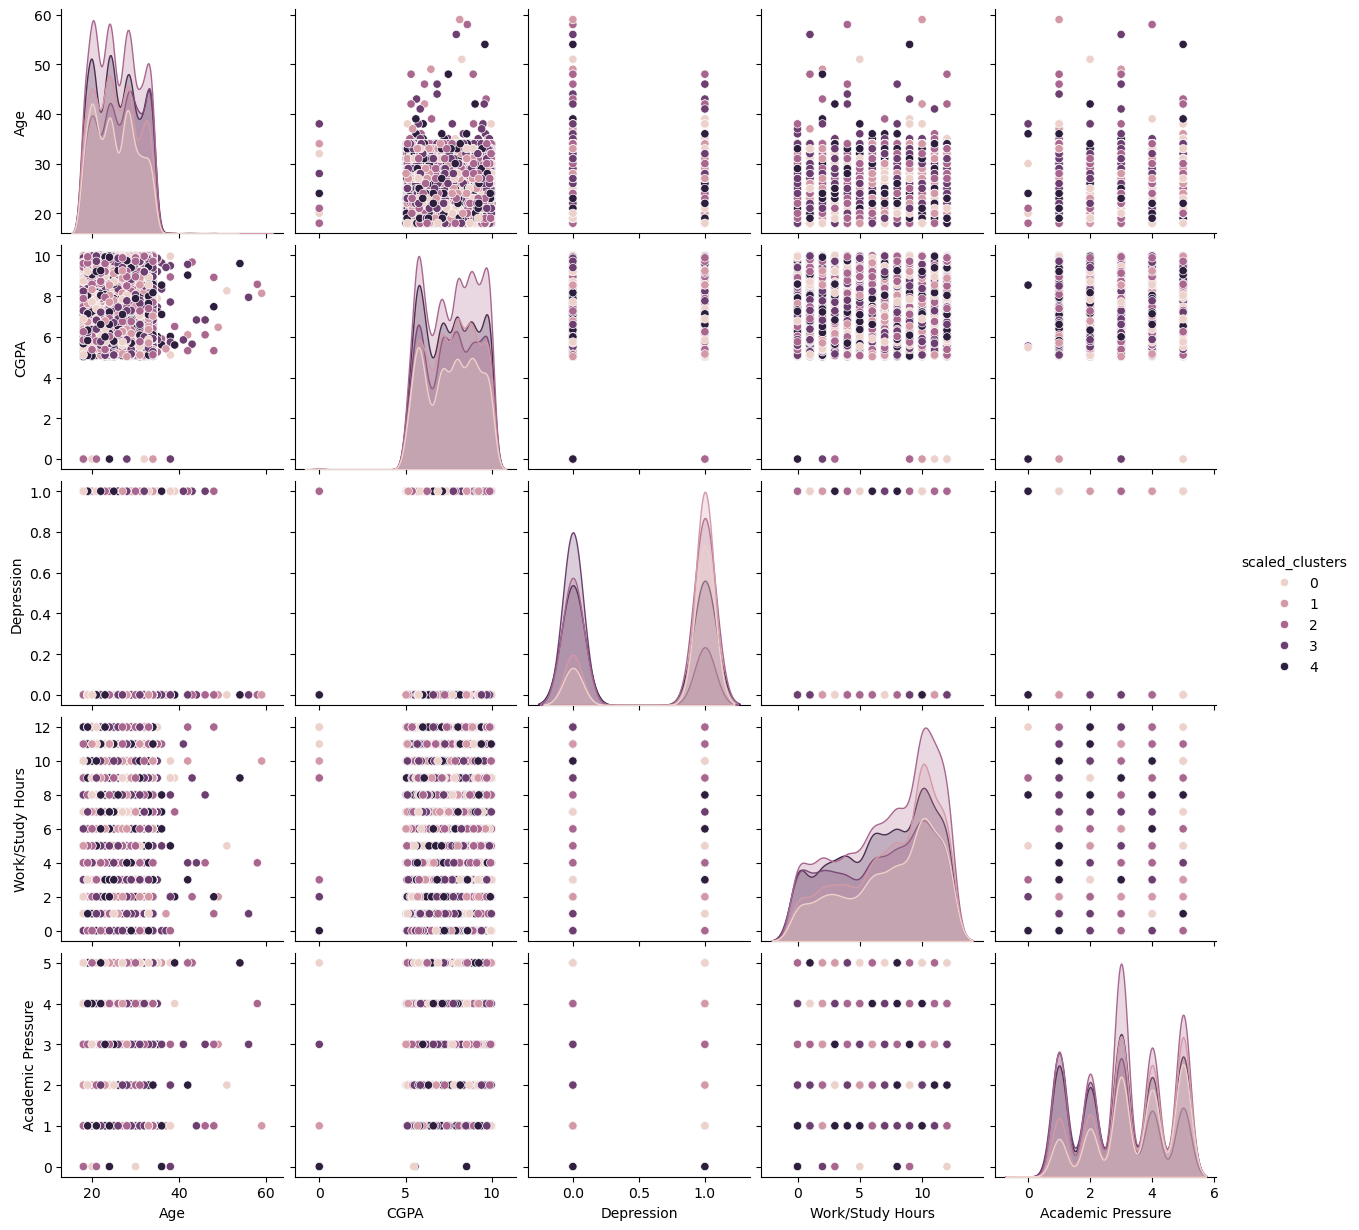

In [ ]:
sns.pairplot(depression4, vars = ["Age", "CGPA", "Depression","Work/Study Hours", "Academic Pressure"], hue = "scaled_clusters")

In [ ]:
depression4[depression4["scaled_clusters"] == 0]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,clusters,scaled_clusters
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,2,0
14,103,Female,19.0,Kalyan,Student,5.0,0.0,5.64,5.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,4.0,5.0,Yes,1,2,0
17,132,Female,20.0,Ahmedabad,Student,5.0,0.0,7.25,3.0,0.0,5-6 hours,Healthy,Class 12,Yes,10.0,3.0,No,1,0,0
36,255,Female,21.0,Bhopal,Student,5.0,0.0,9.72,2.0,0.0,5-6 hours,Moderate,B.Com,Yes,0.0,4.0,Yes,1,2,0
43,285,Female,33.0,Ghaziabad,Student,4.0,0.0,9.21,1.0,0.0,Less than 5 hours,Unhealthy,MBA,Yes,10.0,5.0,Yes,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,140513,Female,25.0,Visakhapatnam,Student,2.0,0.0,8.70,5.0,0.0,5-6 hours,Healthy,B.Ed,Yes,1.0,4.0,Yes,0,2,0
27882,140597,Female,19.0,Mumbai,Student,2.0,0.0,9.21,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,3.0,2.0,No,0,2,0
27889,140669,Female,20.0,Indore,Student,3.0,0.0,7.72,5.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,8.0,1.0,No,0,0,0
27893,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0,3,0


In [ ]:
depression4[depression4["scaled_clusters"] == 1]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,clusters,scaled_clusters
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,1,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1,1,1
10,83,Male,24.0,Nagpur,Student,3.0,0.0,6.10,3.0,0.0,5-6 hours,Moderate,Class 12,Yes,11.0,1.0,Yes,1,3,1
11,91,Male,33.0,Vadodara,Student,3.0,0.0,7.03,4.0,0.0,Less than 5 hours,Healthy,BE,Yes,10.0,2.0,Yes,0,4,1
16,120,Male,25.0,Nashik,Student,5.0,0.0,6.51,2.0,0.0,Less than 5 hours,Unhealthy,M.Ed,Yes,2.0,5.0,Yes,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27877,140558,Male,24.0,Nagpur,Student,3.0,0.0,8.54,3.0,0.0,5-6 hours,Moderate,Class 12,Yes,11.0,2.0,No,0,3,1
27878,140564,Male,27.0,Surat,Student,4.0,0.0,5.16,4.0,0.0,Less than 5 hours,Moderate,M.Pharm,Yes,6.0,2.0,Yes,1,3,1
27886,140631,Male,33.0,Ahmedabad,Student,1.0,0.0,5.70,2.0,0.0,Less than 5 hours,Healthy,MCA,Yes,2.0,2.0,No,0,1,1
27887,140635,Male,28.0,Ludhiana,Student,3.0,0.0,5.03,3.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,6.0,2.0,Yes,0,1,1


In [ ]:
depression4[depression4["scaled_clusters"] == 2]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,clusters,scaled_clusters
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,1,2
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0,1,2
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1,3,2
18,139,Male,19.0,Chennai,Student,2.0,0.0,7.83,2.0,0.0,7-8 hours,Unhealthy,Class 12,No,6.0,3.0,No,0,0,2
21,162,Male,29.0,Kolkata,Student,3.0,0.0,6.73,3.0,0.0,7-8 hours,Moderate,M.Tech,No,0.0,1.0,No,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27873,140536,Male,33.0,Nagpur,Student,1.0,0.0,7.39,4.0,0.0,7-8 hours,Unhealthy,BHM,No,12.0,2.0,No,0,4,2
27875,140547,Male,27.0,Indore,Student,4.0,0.0,9.88,3.0,0.0,7-8 hours,Unhealthy,B.Com,Yes,12.0,2.0,Yes,1,3,2
27881,140594,Male,18.0,Meerut,Student,5.0,0.0,6.25,3.0,0.0,7-8 hours,Unhealthy,Class 12,No,11.0,2.0,Yes,1,0,2
27890,140672,Female,24.0,Hyderabad,Student,3.0,0.0,6.02,2.0,0.0,7-8 hours,Moderate,B.Arch,No,8.0,2.0,No,0,3,2


In [83]:
depression4[depression4["scaled_clusters"] == 3]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,clusters,scaled_clusters
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,2,3
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,4,3
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0,1,3
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0,1,3
12,94,Male,27.0,Kalyan,Student,5.0,0.0,7.04,1.0,0.0,Less than 5 hours,Moderate,M.Tech,No,10.0,1.0,Yes,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27879,140568,Female,28.0,Vasai-Virar,Student,2.0,0.0,5.86,3.0,0.0,Less than 5 hours,Unhealthy,M.Ed,No,1.0,2.0,No,0,1,3
27884,140624,Male,32.0,Rajkot,Student,4.0,0.0,9.19,1.0,0.0,5-6 hours,Healthy,MSc,No,7.0,4.0,Yes,1,4,3
27888,140645,Female,28.0,Thane,Student,4.0,0.0,7.77,3.0,0.0,Less than 5 hours,Unhealthy,MSc,No,2.0,5.0,No,1,1,3
27894,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0,1,3


In [85]:
depression4[depression4["scaled_clusters"] == 4]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,clusters,scaled_clusters
15,106,Male,29.0,Srinagar,Student,3.0,0.0,8.58,3.0,0.0,More than 8 hours,Moderate,M.Tech,Yes,10.0,2.0,Yes,1,4,4
22,166,Female,25.0,Ahmedabad,Student,3.0,0.0,5.57,3.0,0.0,More than 8 hours,Unhealthy,MSc,Yes,10.0,5.0,No,1,3,4
24,173,Male,18.0,Bangalore,Student,4.0,0.0,7.10,3.0,0.0,More than 8 hours,Unhealthy,Class 12,Yes,11.0,5.0,Yes,1,0,4
27,193,Male,25.0,Lucknow,Student,3.0,0.0,7.25,3.0,0.0,More than 8 hours,Unhealthy,M.Ed,Yes,10.0,5.0,No,1,3,4
34,242,Male,21.0,Surat,Student,1.0,0.0,8.04,3.0,0.0,More than 8 hours,Healthy,MA,No,0.0,3.0,Yes,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27876,140548,Male,21.0,Kalyan,Student,1.0,0.0,9.21,3.0,0.0,More than 8 hours,Unhealthy,M.Com,No,10.0,3.0,No,0,0,4
27880,140584,Female,22.0,Kanpur,Student,4.0,0.0,6.61,2.0,0.0,More than 8 hours,Unhealthy,M.Com,Yes,6.0,5.0,No,1,2,4
27883,140601,Female,22.0,Jaipur,Student,5.0,0.0,9.25,4.0,0.0,More than 8 hours,Unhealthy,BBA,Yes,8.0,3.0,No,1,0,4
27885,140630,Male,19.0,Kolkata,Student,4.0,0.0,7.13,1.0,0.0,More than 8 hours,Moderate,Class 12,No,10.0,2.0,No,1,0,4
